In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import optimize
import os
from scipy.optimize import curve_fit
%matplotlib inline

In [345]:
def get_med_fn(L, T, repeat, shi=1.0, nm='sqT'):
    fname = "MED"
    fname += "_L" + str(L) 
    fname += "_T%.1f" % T
    fname += "_shi%.1f" % shi
    fname += "_sHi%.2f" % np.sqrt(T)
    fname += "_r%d" % repeat
    fname += "_" + nm + ".csv"
    return(fname)
def get_spin_fn(L, T, repeat, shi=1.0, nm='sqT'):
    fname = "spin"
    fname += "_L" + str(L) 
    fname += "_T%.1f" % T
    fname += "_shi%.1f" % shi
    fname += "_sHi%.2f" % np.sqrt(T)
    fname += "_r%d" % repeat
    fname += "_" + nm + ".csv"
    return(fname)
def mag_plot(L, reps, Ts=[0.1, 0.5, 1.0, 2.0]):
    plt.figure(1, figsize = (10,10))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_med_fn(L, T, reps)
        med = pd.read_csv(fname, skiprows=1)
        plt.subplot(2, 2, i+1)
        plt.plot(med['mc_step'], med['mag'])
        plt.xlim([0,np.max(med['mc_step'])])
        #plt.ylim([-0.005, 0.005])
        if(i>1):
            plt.xlabel("MC steps", fontsize = 16)
        if(i%2==0):
            plt.ylabel("$<m>$", fontsize = 16)
        plt.title("Magnetization, T=%.1f" % (T), fontsize=16)
def energy_plot(L, reps, Ts=[0.1, 0.5, 1.0, 2.0]):
    plt.figure(1, figsize = (10,10))
    for i in range(len(Ts)):
        T = Ts[i]
        fname = '../data/' + get_med_fn(L, T, reps)
        med = pd.read_csv(fname, skiprows=1)
        plt.subplot(2, 2, i+1)
        plt.plot(med['mc_step'], med['energy'])
        plt.xlim([1,500])
        #plt.ylim([1.8, 2.0])
        plt.autoscale(axis='y')
        if(i>1):
            plt.xlabel("MC steps", fontsize = 16)
        if(i%2==0):
            plt.ylabel("$<e>$", fontsize = 16)
        plt.title("Energy, T=%.1f" % (T), fontsize=16)
        
def get_param_file(fname):
    fe = fname.split('_')
    L=float(fe[1][1:])
    T=float(fe[2][1:])
    shi=float(fe[3][3:])
    sHi=float(fe[4][3:])
    reps=float(fe[5][1:])
    #print "L=%.2f; T=%.2f; shi=%.2f; sHi=%.2f; reps=%.0f" % (L, T, shi, sHi, reps)
    return [L, T, shi, sHi, reps]

def get_exp(x, y):
    ind = np.argmax(y)
    offset = 20 + ind
    x = np.array(x)[offset:]
    y = np.array(y)[offset:]
    def func(x,  ee, A, c):
        return ee + A * (x**(-c))
    try:
        popt, pcov = curve_fit(func, x, y, p0=(-1.9899, 0.01, 0.09), maxfev=5000)
    except RuntimeError:
        return [0, 0, 0]
    return popt

def get_med_files(path='../data'):
    files=[]
    for file in os.listdir("../data"):
        if file.startswith("MED"):
            files += [file]
    return files

-1.96346849
3
-1.96346849


array([-1.99807151,  0.04088987,  0.08567728])

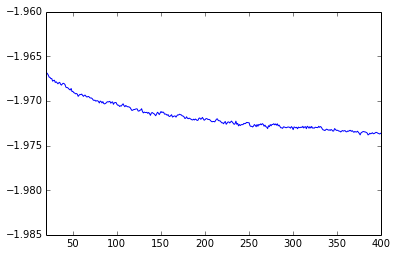

In [368]:
fn = get_med_fn(128, 0.8, 200)
fn = '../data/'+fn
med = pd.read_csv(fn, skiprows=1)
x=med['mc_step']
y=med['energy']
print np.max(y)
print np.argmax(y)
print y[np.argmax(y)]
area = [20,400]
plt.plot(x,y)
plt.xlim(area)
get_exp(x[area[0]:area[1]], y[area[0]:area[1]])

      L    T  shi  sHis  repetition        ee            A          c
4    64  1.0    1  1.00        2000 -4.073919     2.176557   0.003015
1   128  0.8    1  0.89         200 -2.200949     0.241253   0.009986
18   64  0.5    1  0.71        1000 -2.015841     0.080400   0.077334
2   256  0.5    1  0.71         200 -2.012999     0.029404   0.043858
9   128  0.5    1  0.71         200 -2.007688     0.040709   0.080822
17  128  0.3    1  0.55         200 -2.001478     0.032897   0.076800
3   128  0.1    1  0.32         200 -1.989119     0.018152   0.054071
14   32  0.1    1  0.32        1000 -1.948187     0.065280   0.060369
16   32  1.0    1  1.00        1000 -1.940730     0.046811   6.065272
8   128  1.5    1  1.22         200 -1.781090    -0.176674  14.151523
10  128  2.0    1  1.41         200 -1.468752  3862.420149   3.235573
0    64  2.0    1  1.41        1000 -1.467892   276.022788   2.619890
13   32  2.0    1  1.41        1000 -1.467721   169.811110   2.488245
12   64  0.1    1  0

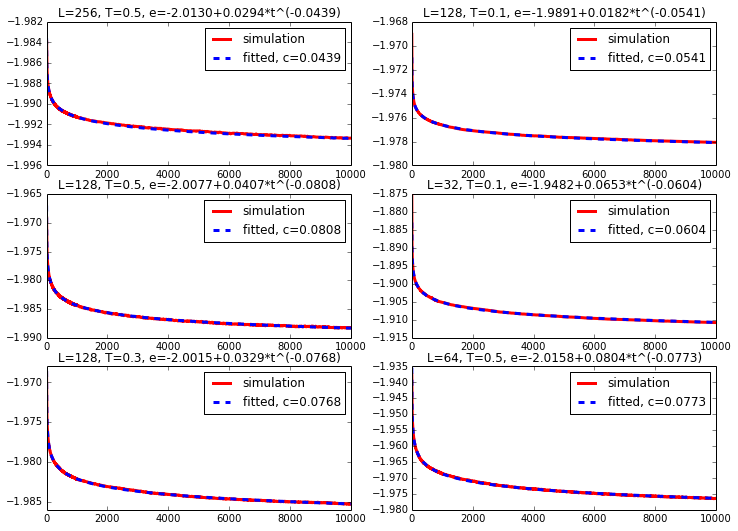

In [333]:
path = "../data/"
med_files = get_med_files(path)
Ls = []
Ts = []
shis = []
sHis = []
reps = []
ees = []
As = []
cs = []
pltnum=0
plt.figure(figsize=(12,18))
for fname in med_files:
    fname = path+fname
    #print fname
    med = pd.read_csv(fname, skiprows=1)
    [L, T, shi, sHi, rep] = get_param_file(fname)
    [ee, A, c]=get_exp(med['mc_step'], med['energy'])
    Ls += [L]
    Ts += [T]
    shis += [shi]
    sHis += [sHi]
    reps += [rep]
    ees += [ee]
    As += [A]
    cs += [c]
    if(abs(ee+2.0)<0.1 and abs(A-0.1)<0.1 and abs(c-0.1)<0.1):
        pltnum += 1
        plt.subplot(6,2,pltnum)
        plt.plot(med['mc_step'], med['energy'],'r-', linewidth=3, label='simulation')
        x = np.arange(1,10000)
        y = ee + A*x**(-c)
        plt.plot(x,y, 'b--', linewidth=3, label='fitted, c=%.4f' % c)
        plt.title("L=%.0f, T=%.1f, e=%.4f+%.4f*t^(-%.4f)" % (L, T, ee, A, c))
        plt.xlim([1,10000])
        plt.legend(loc="top right")
results = pd.DataFrame({"L":Ls, "T":Ts, "shi":shis, "sHis":sHis, "repetition":reps, "ee":ees, "A":As, "c":cs})
cols = ["L", "T", "shi", "sHis", "repetition", "ee", "A", "c"]
results = results[cols]
results = results.sort(['ee', 'T'], ascending=[1, 1])
print results
#plt.savefig("Energy relaxation fitting.pdf")

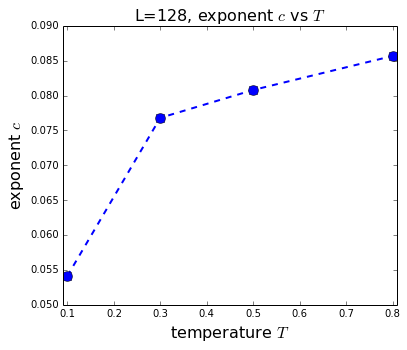

In [378]:
x=[0.1, 0.3, 0.5, 0.8]
y=[0.0541, 0.0768, 0.0808, 0.08567728]
plt.figure(figsize=(6,5))
plt.plot(x, y, 'o--', linewidth = 2, markersize=10)
plt.xlim([0.09, 0.81])
plt.xlabel("temperature $T$", fontsize=16)
plt.ylabel("exponent $c$", fontsize=16)
plt.title("L=128, exponent $c$ vs $T$", fontsize=16)
plt.savefig("CvsT.pdf")
plt.savefig("CvsT.png")

In [237]:
cs

[[...], [...], [...]]

[-2.01331618  0.07846607 -0.08182562]
[[  6.55958615e-08  -5.21643793e-08  -1.18377878e-07]
 [ -5.21643793e-08   4.18297482e-08   9.35243488e-08]
 [ -1.18377878e-07   9.35243488e-08   2.14774712e-07]]


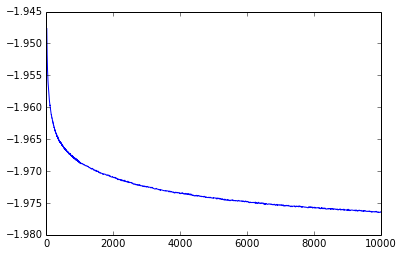

In [127]:
L=64
T=.5
reps=1000
fname = '../data/' + get_med_fn(L, T, reps)
med = pd.read_csv(fname, skiprows=1)

xd = np.array(med['mc_step'])[10:]
yd = np.array(med['energy'])[10:]
plt.plot(xd, yd)

def func(x,  p1, p2, p3):
    return p1 + p2 * (x**(p3))

popt, pcov = curve_fit(func, xd, yd, p0=(-1.98, 0.001, 0.001), maxfev=3000)
print popt
print pcov

In [195]:
files=[]
for file in os.listdir("../data"):
    if file.startswith("MED"):
        files += [file]
print files

['MED_L64_T2.0_shi1.0_sHi1.41_r1000_sqT.csv', 'MED_L256_T0.5_shi1.0_sHi0.71_r200_sqT.csv', 'MED_L128_T0.1_shi1.0_sHi0.32_r200_sqT.csv', 'MED_L64_T1.0_shi1.0_sHi1.00_r2000_sqT.csv', 'MED_L128_T1.0_shi1.0_sHi1.00_r1000_sqT.csv', 'MED_L256_T1.0_shi1.0_sHi1.00_r200_sqT.csv', 'MED_L32_T0.5_shi1.0_sHi0.71_r1000_sqT.csv', 'MED_L128_T0.5_shi1.0_sHi0.71_r200_sqT.csv', 'MED_L128_T2.0_shi1.0_sHi1.41_r200_sqT.csv', 'MED_L128_T1.0_shi1.0_sHi1.00_r200_sqT.csv', 'MED_L64_T0.1_shi1.0_sHi0.32_r1000_sqT.csv', 'MED_L32_T2.0_shi1.0_sHi1.41_r1000_sqT.csv', 'MED_L32_T0.1_shi1.0_sHi0.32_r1000_sqT.csv', 'MED_L64_T1.0_shi1.0_sHi1.00_r1000_sqT.csv', 'MED_L32_T1.0_shi1.0_sHi1.00_r1000_sqT.csv', 'MED_L64_T0.5_shi1.0_sHi0.71_r1000_sqT.csv']


In [159]:
fe = files[1].split('_')
L=float(fe[1][1:])
T=float(fe[2][1:])
shi=float(fe[3][3:])
sHi=float(fe[4][3:])
reps=float(fe[5][1:])
print "L=%.2f; T=%.2f; shi=%.2f; sHi=%.2f; reps=%.0f" % (L, T, shi, sHi, reps)

L=256.00; T=0.50; shi=1.00; sHi=0.71; reps=200


In [212]:
def get_med_files(path='../data'):
    files=[]
    for file in os.listdir("../data"):
        if file.startswith("MED"):
            files += [file]
    return files

In [213]:
get_med_files()

['MED_L64_T2.0_shi1.0_sHi1.41_r1000_sqT.csv',
 'MED_L256_T0.5_shi1.0_sHi0.71_r200_sqT.csv',
 'MED_L128_T0.1_shi1.0_sHi0.32_r200_sqT.csv',
 'MED_L64_T1.0_shi1.0_sHi1.00_r2000_sqT.csv',
 'MED_L128_T1.0_shi1.0_sHi1.00_r1000_sqT.csv',
 'MED_L256_T1.0_shi1.0_sHi1.00_r200_sqT.csv',
 'MED_L32_T0.5_shi1.0_sHi0.71_r1000_sqT.csv',
 'MED_L128_T0.5_shi1.0_sHi0.71_r200_sqT.csv',
 'MED_L128_T2.0_shi1.0_sHi1.41_r200_sqT.csv',
 'MED_L128_T1.0_shi1.0_sHi1.00_r200_sqT.csv',
 'MED_L64_T0.1_shi1.0_sHi0.32_r1000_sqT.csv',
 'MED_L32_T2.0_shi1.0_sHi1.41_r1000_sqT.csv',
 'MED_L32_T0.1_shi1.0_sHi0.32_r1000_sqT.csv',
 'MED_L64_T1.0_shi1.0_sHi1.00_r1000_sqT.csv',
 'MED_L32_T1.0_shi1.0_sHi1.00_r1000_sqT.csv',
 'MED_L64_T0.5_shi1.0_sHi0.71_r1000_sqT.csv']

In [193]:
[L, T, shi, sHi, reps] = get_param(files[0])
print "L=%.2f; T=%.2f; shi=%.2f; sHi=%.2f; reps=%.0f" % (L, T, shi, sHi, reps)

L=64.00; T=2.00; shi=1.00; sHi=1.41; reps=1000
L=64.00; T=2.00; shi=1.00; sHi=1.41; reps=1000


In [185]:
get_param(files[6])

L=32.00; T=0.50; shi=1.00; sHi=0.71; reps=1000


(32.0, 0.5, 1.0, 0.71, 1000.0)

In [188]:
[L, T, shi, sHi, reps] = (31.0, 0.6, 1.0, 0.71, 1000.0)

In [190]:
T

0.6